In [120]:
from netCDF4 import Dataset
import numpy as np

#filename = 'ff_trs_neg.nc'
filename = 'ff_trs_pos_vor850_NorESM2-LM_2010.nc'
dataset = Dataset(filename, 'r')
nc_vars = [var for var in dataset.variables]

#Variable Information
for var in nc_vars:
    print('\tName:', var)
    print("\t\tdimensions:", dataset.variables[var].dimensions)
    #print("\t\tunits:", dataset.variables[var].units)
    print("\t\tsize:", dataset.variables[var].size)

	Name: TRACK_ID
		dimensions: ('tracks',)
		size: 2082
	Name: FIRST_PT
		dimensions: ('tracks',)
		size: 2082
	Name: NUM_PTS
		dimensions: ('tracks',)
		size: 2082
	Name: index
		dimensions: ('record',)
		size: 43361
	Name: time
		dimensions: ('record',)
		size: 43361
	Name: longitude
		dimensions: ('record',)
		size: 43361
	Name: latitude
		dimensions: ('record',)
		size: 43361
	Name: curvature_vorticity
		dimensions: ('record',)
		size: 43361


In [121]:
#dataset.variables['pressure_sea_level'][0:10]

lons = dataset.variables['longitude'][:]
lats = dataset.variables['latitude'][:]
first_pts = dataset.variables['FIRST_PT'][:]
track_id = dataset.variables['TRACK_ID'][:]

In [122]:
list = dataset.variables['longitude'][400:500]
print(list)
newlist = ((list - 180) % 360) - 180
print(newlist)

[ 66.22492   60.65928   52.094913  27.850595  15.58545    2.422332
 353.0313   344.70575  342.21362  333.47003  346.23956  349.09967
 189.0631   188.78479  189.42346  190.71391  192.78773  195.19113
 198.46802  202.45537  206.44563  210.1441   146.64447  146.82253
 146.4329   146.60054  147.65303  148.66553  149.699    151.37027
 154.09726  157.48001  160.98396  165.31969  170.20963  175.37703
 180.67892  185.73904  190.59625  194.99304  198.38449  200.7382
 202.36606  204.15244  206.46516  208.94688  211.03334  210.91133
 208.56772  205.4044   203.94814  202.23576  201.66884  201.03963
 200.88992  200.84526  201.65097  202.88773  204.42142  206.646
 209.17361  212.03496  216.06236  219.9866   222.96382  219.43939
 223.6881   227.08617  229.98433  232.01564  233.83678  235.43909
 236.48512  237.0119   327.7682   328.95804  330.92175  334.66357
 339.48923  345.52722  349.93942  356.4116     0.862896   4.931603
   8.206549  11.115891  13.736439  16.130808  18.866287  21.23318
  22.815195

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid
from mpl_toolkits.basemap import addcyclic

<Figure size 432x288 with 0 Axes>

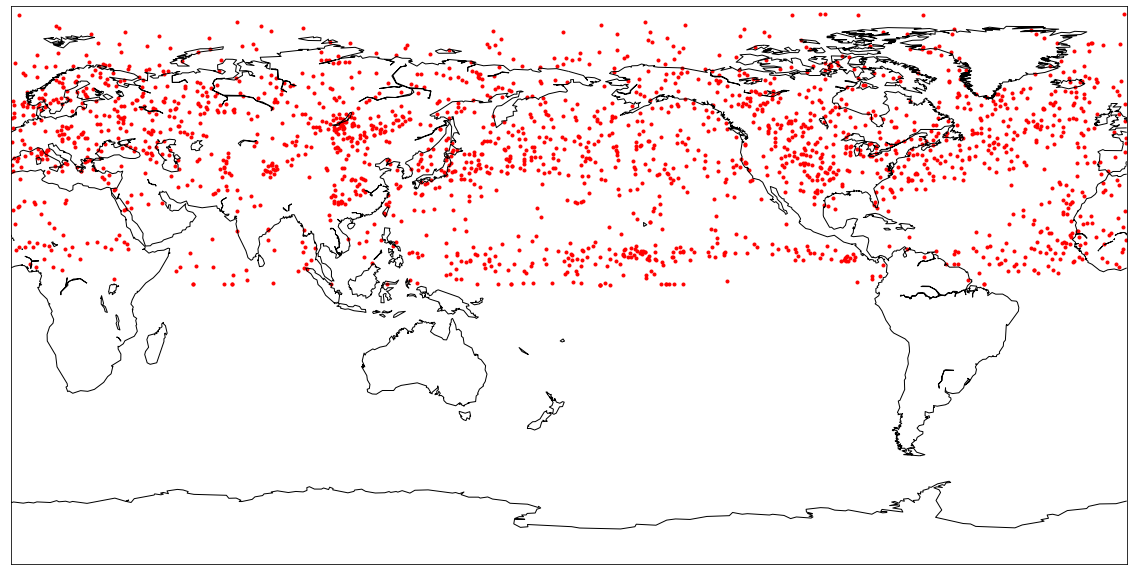

In [124]:
%matplotlib inline

fig1 = plt.figure()
plt.figure(figsize=(20,20))

#m=Basemap()

m = Basemap(projection='cyl', lon_0=180)
#m = Basemap(projection='npstere',boundinglat=10,lon_0=0,resolution='l')

m.drawcoastlines()
#m.fillcontinents()
#m.addcyclic()

#colors = {'CCM': 'red', 'SCME': 'white', 'SCM': 'yellow'}

for track in track_id[:-1]:

    latitudes = lats[first_pts[track]]#:first_pts[track+1]]
    longitudes = lons[first_pts[track]]#:first_pts[track+1]]
    
    #print(longitudes)
    
    #print("-----------------------------------------------------")
    
    lon = longitudes
    #lon = ((longitudes - 180) % 360) - 180
    
    #lats , lons = addcyclic(latitudes, longitudes)
    
    #longitudes = m.shiftdata(longitudes)
    #longitudes, latitudes = m.shiftdata(longitudes, latitudes)
    
    #print(lon)
    #print(latitudes)

    #Convert latitude and longitude to coordinates X and Y
    x, y = m(lon, latitudes)

    #Plot the points on the map
    #plt.plot(x,y,'-', label=track, color='red')
    #m.plot(x, y, marker=None,color='red')#, latlon=True)
    m.scatter(x, y, marker='.',color='r')#, latlon=True)


plt.show()

In [60]:
from matplotlib import cm as cmap

<Figure size 432x288 with 0 Axes>

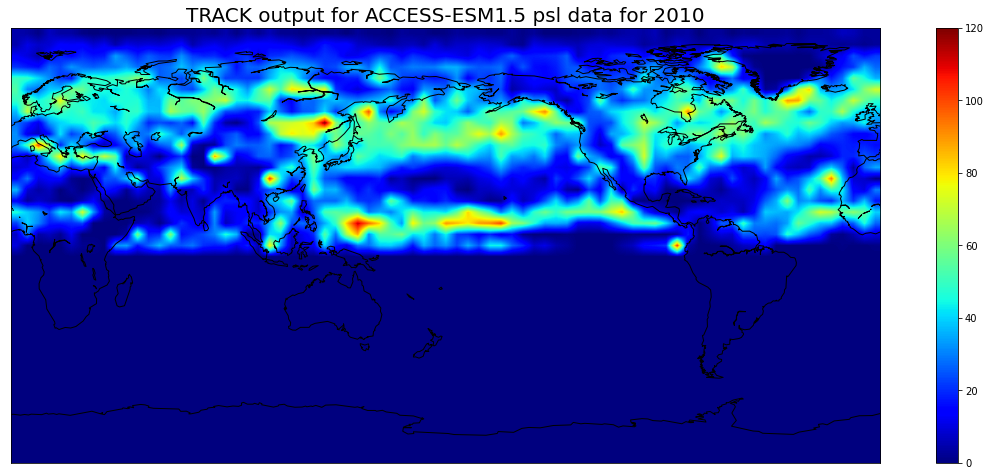

In [125]:
%matplotlib inline

fig1 = plt.figure()
plt.figure(figsize=(20,8))

#m=Basemap()

m = Basemap(projection='cyl', lon_0=180)
#m = Basemap(projection='npstere',boundinglat=10,lon_0=0,resolution='l')

m.drawcoastlines()

xs, ys = m(lons, (lats + 90)/2)

xedges = np.linspace(0, 360, 80)
yedges = np.linspace(0, 90, 40)

heatmap, xedges, yedges = np.histogram2d(xs, ys, bins=(xedges, yedges))

m.imshow(heatmap.T, interpolation='bilinear', cmap=cmap.jet)
plt.colorbar()
plt.title("TRACK output for ACCESS-ESM1.5 psl data for 2010", fontdict = {'fontsize' : 20})
plt.show()



In [66]:
print(lons[0:10])
print(xs[0:10])

[329.8091  334.1976  337.1819  339.502   341.452   342.7061  343.47845
 345.17624 347.00052 348.5003 ]
[329.8091  334.1976  337.1819  339.502   341.452   342.7061  343.47845
 345.17624 347.00052 348.5003 ]


162.80652
66.0722


<Figure size 432x288 with 0 Axes>

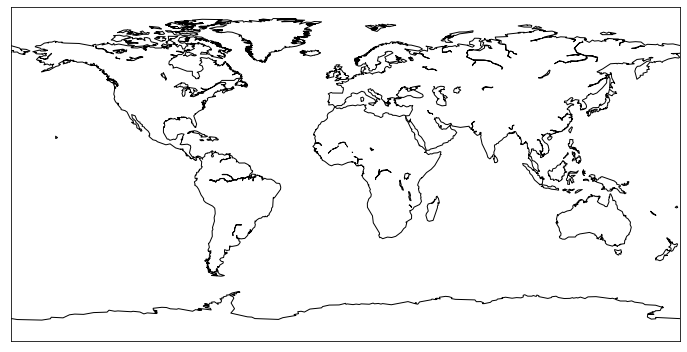

In [23]:
%matplotlib inline

fig1 = plt.figure()
plt.figure(figsize=(12,17))

m=Basemap()
 
m.drawcoastlines()
#m.fillcontinents()

#colors = {'CCM': 'red', 'SCME': 'white', 'SCM': 'yellow'}

#for track in track_id[:-1]:

    #latitudes = lats[first_pts[track]:first_pts[track+1]]
    #longitudes = lons[first_pts[track]:first_pts[track+1]]

    #Convert latitude and longitude to coordinates X and Y
    #x, y = m(longitudes, latitudes)

    #Plot the points on the map
    #plt.plot(x,y,'-', label=track, color='red')

x, y = m(lons[0],lats[0])

print(x)
print(y)

plt.show()

In [117]:
import cf
import cfplot as cfp


In [119]:
f=cf.read('ff_trs_pos_vor850_NorESM2-LM_2010.nc')[0]
cfp.traj(f)

TypeError: 


traj error
missing longitudes in the field auxiliary data
missing latitudes in the field auxiliary data



